__Name__

__Rules__ Any kind of communications are strictly prohibited. But you can use book, note, or internet.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import fmin

__Problem__

We consider BSM model with the following parameters:

In [0]:
'''======parameters============='''
s0, r, sigma, T, K, otype = [30., .02, 0.3, 1., 31.0, 1] # spot, rate, vol, maturity, strike, option type

- (Q) Write for the european call the explicit pricing formula, then find call price.

(your latex here)

The call and put price with maturity $T$ and $K$ will be known as $C_0$ and $P_0$ given as below:
$$C_0 = \mathbb E [e^{-rT} (S(T) - K)^+] = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
and 
$$P_0 = \mathbb E [e^{-rT} (S(T) - K)^-] = K e^{-rT} \Phi(- d_2) - S_0  \Phi(- d_1),$$
where $d_i$ are given as
$$d_1 = \frac{(r + \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T},$$
and
$$d_2 = \frac{(r - \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T} = d_1 - \sigma \sqrt T$$

Put-call parity will be useful:
    $$C_0 - P_0 =  S(0) - e^{-rT} K.$$

In [3]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm(s0, r, sigma, T, K, otype):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma ** 2) 
          * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    return (otype * s0 * norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * T) * K * norm.cdf(otype * d2))

print('>>>> call price is ' + str(bsm(s0, r, sigma, T, K, otype)))      

>>>> call price is 3.4102506629837706


- (Q) 
    - Fourier transform $\phi$ of $\ln S_T$;
    - write down call in terms of $\phi$;
    - then find call price using the above formula.

(contributed by ziyue)

**1.Fourier transform $\phi$ of $\ln S_T$**
<br>
Since $$S_T=S_0*e^{(r-0.5\sigma^2)t+\sigma W_t}$$,
$$\ln S_T=\ln S_0+(r-0.5\sigma^2)t+\sigma W_t$$
and since $W_T$ is a standard Brownian Motion, so we have $W_t\sim \mathcal N(0,t)$ , then

$$\phi(\ln S_T)=i\mu u-\frac{\sigma^2 u^2}{2}$$
<br>
**2.the call price in terms of $\phi$;**
$$
C = S_{0}I_{1} - Ke^{-rT}I_{2}
$$
where
$$
I_{1}=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty}Re(\frac{e^{-iu\log(K/S_0)}\phi(u-i)}{iu\phi(-i)})du=\frac{1}{2} + \frac{1}{\pi} \int_{0}^{\infty} \frac{\sin(d_{1}t)}{t}e^{-\frac{t^{2}}{2}}dt
$$

$$
I_{2}=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty}Re(\frac{e^{-iu\log(K/S_0)}\phi(u)}{iu})du=\frac{1}{2} + \frac{1}{\pi} \int_{0}^{\infty}\frac{\sin (d_{2}t)}{t}e^{-\frac{t^{2}}{2}}dt
$$
and
$$d_{1} = \frac{\log(\frac{S_{0}}{K}) + (r + \frac{\sigma^{2}}{2})T}{\sigma\sqrt{T}}$$

$$d_{2} = \frac{\log(\frac{S_0}{K})+(r-\frac{\sigma^{2}}{2})T}{\sigma \sqrt{T}}$$

In [4]:
'''========
Black-Scholes-Merton price by Fourier transform. 
=========='''

def bsm_fourier(s0, r, sigma, T, K, otype):
    log_s0 = np.log(s0)
    log_k = np.log(K)
    mu = r - .5*sigma**2
    
    char_fun = lambda u: np.exp(1j*u*(log_s0+mu*T) - .5*(sigma**2)*T*(u**2))
    integrand1 = lambda u: (np.exp(-1j*u*log_k)*char_fun(u-1j)
                           / (1j*u*char_fun(-1j))).real
    pi_1 = .5+ 1/np.pi*quad(integrand1, 0, np.inf)[0]

    integrand2 = lambda u: (np.exp(-1j*u*log_k)*char_fun(u)
                           / (1j*u)).real
    pi_2 = .5+ 1/np.pi*quad(integrand2, 0, np.inf)[0]

    price = s0*pi_1 - K*np.exp(-r*T)*pi_2 #this is call price
    if otype == -1:
        price = price - s0 + K*np.exp(-r*T)
    return price

print('>>> call price by fourier trnasform is ' + str(bsm_fourier(s0, r, sigma, T, K, otype)))

>>> call price by fourier trnasform is 3.410250662983744


- Prove that call price is increasing with respect to its maturity, and demonstrate your result numerically.

(your latex here)

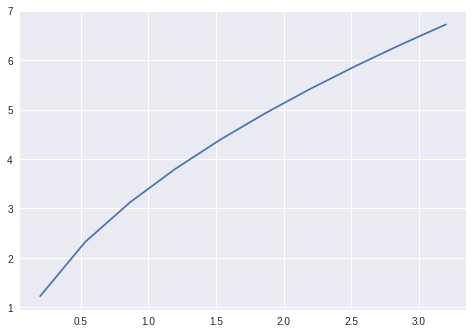

In [5]:
'''====your code here==='''
x_co = np.linspace(0,3,10)+.2
y_co = [bsm(s0, r, sigma, T_arr, K, otype) for T_arr in x_co] 
plt.plot(x_co, y_co)

- Do you think that call price is also increasing with respect to its maturity for Heston model? Please justify your answer.

(your latex here)

Yes

- (Q) With the same parameters for GBM above, price the arithmetic asian option with $T = 1$, $K= 31$, and two periods (i.e. average prices of three time instants)

In [12]:
#(cotributed by wenhao)
T=1;K=31;num_step=2;num_path=100000;
def BM_gen(T1,T2,n):
  t=np.linspace(T1,T2,num=n+1)
  W=np.zeros(n+1)
  for i in range(n):
    W[i+1]=W[i]+1./np.sqrt(n)*np.random.normal()
  return t,W
def bsm_arithmetic_exact_sample(otype,strike,maturity,num_step,num_path):
    MC_A=[]
    for i in range(num_path):
        t,W=BM_gen(0.,maturity,num_step)
        A=np.mean(s0*np.exp((r-(1/2)*sigma**2)*t+sigma*W))
        MC_A.append(np.exp(-r*maturity)*np.max([0, (A- strike)*otype]))
        A=0
    Asion_price=np.mean(MC_A)
    return Asion_price
arithmetic= bsm_arithmetic_exact_sample(otype,K,T,num_step,num_path)
print(arithmetic)

1.5925820990955448


__Problem__

We consider the call price underlying XYZ stock with spot price $\$30$ and interest rate $2\%$. Below is the current market call prices corresponding to its maturity $T=1$ and different strikes:

In [0]:
s0, r, T, otype = [30., .02, 1., 1] # spot, rate, maturity, option type
strike_arr = [28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0]
market_call_arr = [5.7, 5.0, 4.5, 4.1, 3.8, 3.6, 3.6, 3.7, 3.9]

- (Q) Find their implied volatilities and draw its volatility smile

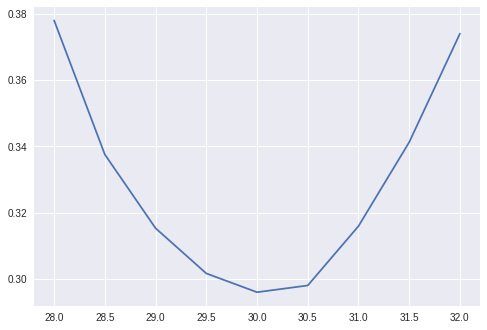

In [7]:
def bsm_implied_volatility(s0, r, T, K, otype, market_call):
    error_function = lambda sigma: np.abs(market_call - bsm(s0, r, sigma, T, K, otype))
    init_sigma = .2
    return fmin(error_function, init_sigma, disp = 0)[0]

vol_arr = []
for i in range(len(strike_arr)):
    vol_arr.append(bsm_implied_volatility(s0, r, T, strike_arr[i], otype, market_call_arr[i]))

plt.plot(strike_arr, vol_arr)

- (Q.) Find bsm calibrated volatility to the above data by minimizing $L^2$ norm in the error.

In [8]:
def bsm_calibrated_volatility(s0, r, T, K_arr, otype, market_call_arr):
    def error_function(sigma):
        bsm_arr = np.array([bsm(s0, r, sigma, T, k, otype) for k in K_arr])
        err_arr = market_call_arr - bsm_arr
        return np.sum(err_arr**2)
    init_sigma = .2
    return fmin(error_function, init_sigma, disp = 0)[0]
print('>>>>>')
print('calibrated volatility is ' + str(bsm_calibrated_volatility(s0, r, T, strike_arr, otype, market_call_arr)))

>>>>>
calibrated volatility is 0.3299218750000005


__Problem__

Let $f:\mathbb R\mapsto \mathbb R$ be a smooth even function 
satisfying $f(0) = 0$. 
Our objective is to approximate  the second order derivative $f''(0)$. 
- Prove that $f'(0) = 0.$
- Ziyue proposes the following estimator for $f''(0)$: for a step size $h$
 $$a_{h} = \frac{2f(h)}{h^{2}}.$$
 Please justify that Chenyu's estimation has its convergence $O(h^{2})$.
- Is there anyway to improve the above 
 convergence to $O(h^{4})$ in the form of 
 $$b_{h} = \frac{c_{1} f(h) + c_{2}f(2h)}{h^{2}}$$
 for some constants $c_{1}$ and $c_{2}$?
- If the above function $f$ is odd and other properties remain the same, how do you want to find the $f''(0)$ efficiently?


__Soln__ (your latex input here)

- it can be directly shown from the definition of $f'$.
- $f^{n}(0) = 0$ for all odd number $n$. Therefore, 
 taylor expansion gives 
 $$f(h) = \frac 1 2 h^{2} f''(0) + \frac 1 {24} h^{4}f^{(4)}(0) + O(h^{6}),$$
 and the result follows.
- we can combine the above taylor expansion with
 $$f(2h) = 2h^{2} f''(0) + \frac 2 3 h^{4} f^{(4)}(0) + O(h^{6}).$$
 It yields that, with $c_{1} = 8/3$ and $c_{2} = - 1/6$, 
 $$c_{1} f(h) + c_{2}f(2h) = h^{2}f''(0) + O(h^{6}).$$
- If $f$ is odd, then $f''(0) = 0$ and no estimate is needed any more.

__Problem__

Thomas proposed the following estimator for the value $\pi$.
$$\hat \pi = c \cdot I(X_1^2 + X_2^2< 1/2)$$
where $X_1$ and $X_2$ are two independent uniform random variable on $(-1,1)$.

- (Q) find the constant $c$ so that $\hat \pi$ is unbiased estimator to $\pi$;
- (Q) for $c$ in the above question, what is its MSE?

__Soln__(your latex here)


- $c = 8$, since
$$\mathbb E \hat \pi = c \mathbb P(X_1^2 + X_2^2 <1/2) = c \cdot \pi/8 = \pi$$
- $MSE = 8\pi - \pi^2$, since
$$MSE = Var = \mathbb E[\hat \pi^2] - (\mathbb E[\hat \pi])^2
= 64 \cdot \pi/8 - \pi^2.$$





- (Q) can you propose a better mc estimator with smaller MSE?

__Soln__ (your latex here)

- (Q) using log-log chart, please demonstrate the theoretical MSE obtained in your algorithm above?

In [0]:
'''====== your code here ======='''
pass

__Problem__

- (Q) Given a random variable $Z$ uniformly distributed on $B_1$, find the probability of $Z$ in $B_{1/2}$.

__Soln__(your latex here)

It's the ratio of area of $B_{1/2}$ and area of $B_1$, i.e. $1/4$.

- (Q) Demonstrate your answer numerically by doing so:
    - Generate 1000 smaplings uniformly from $B_1$;
    - counte points in $B_{1/2}$. 

In [10]:
'''===== your code here======'''
num_sample = 1000
sample_arr = np.zeros([2,num_sample])
i = 0
while i<num_sample:
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2+y**2<1:
        sample_arr[0,i] = x
        sample_arr[1,i] = y
        i = i+1

tot = 0
for i in range(num_sample):
    if sample_arr[0,i]**2+sample_arr[1,i]**2<.25:
        tot = tot+1
print(tot/num_sample)

0.243


- (Q) Justify your random sampling in the above

__soln__ (your latex here)

For any $A\subset B_1$, we have 
$$\mathbb P(Z\in A|Z\in B_1) = \frac 1 \pi \int_A 1\cdot dx.$$